# Step 1 - Finding and using a dataset about Bristol

The dataset I have chosen to use is about traffic accidents in Bristol - https://opendata.bristol.gov.uk/datasets/bcc::traffic-accidents-1/explore?location=51.464594%2C-2.597639%2C11.70.

More specifically the dataset involves personal injury accidents that were reported to the police and passed on to the City Council. Damage only accidents are not recorded in this dataset.

The reason this dataset interests me is because I find it interesting to explore the patterns of different traffic incidents and if there are certain causes of traffic incidents such as time of day and if there are patterns in terms of severity of accidents and what variables can affect it. It is also interesting learning about if different types of accidents are more severe than others based on the type of accident that happened and if there are correlations to be found in this area. The dataset provides many different variables that can help with testing certain hypotheses and the dataset is robust enough for there to be accurate results in my analysis. The main variables of interest in this dataset are time, date, severity and description, accident type and description and the variables relating to certain demographics (e.g OAPS, children etc). I believe that these variables will allow me to provide a detailed analysis of this dataset and allow me to ask several questions about the data and test certain hypotheses that will allow me to give a conclusion to my analysis.

# Step 2 - Data Preparation and Cleaning

In [1]:
#importing relevant libraries for data analysis
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#importing the csv file as loading it into a dataframe
df = pd.read_csv('Traffic_accidents.csv')

In [3]:
#checking the first 5 rows of the dataframe to check format of data
print(df.head(5))

   OBJECTID  REF_NUMBER                   DATE_  TIME  SEVERITY   
0         1   171701142  2017/02/02 00:00:00+00   720         3  \
1         2   171701145  2017/02/02 00:00:00+00  1803         3   
2         3   171701159  2017/02/03 00:00:00+00  2021         3   
3         4   171701160  2017/02/03 00:00:00+00  1543         3   
4         5   171701174  2017/01/17 00:00:00+00   624         3   

  SEVERITY_DESCRIPTION ACCIDENT_TYPE   
0               Slight            LC  \
1               Slight             J   
2               Slight            J2   
3               Slight            NT   
4               Slight             A   

                       ACCIDENT_DESCRIPTION  VEHICLES  CASUALTIES  PEDESTRIAN   
0                           Loss of Control         2           2           0  \
1  Turning movement ¿ unidentified priority         2           1           0   
2          Turning Movement from minor road         2           1           0   
3                              N

In [4]:
#checking the column names 
print(df.columns)

Index(['OBJECTID', 'REF_NUMBER', 'DATE_', 'TIME', 'SEVERITY',
       'SEVERITY_DESCRIPTION', 'ACCIDENT_TYPE', 'ACCIDENT_DESCRIPTION',
       'VEHICLES', 'CASUALTIES', 'PEDESTRIAN', 'CYCLES', 'MCYCLES', 'CHILDREN',
       'OAPS', 'ACCIDENT_DETAILS', 'X', 'Y', 'RENDER'],
      dtype='object')


In [5]:
#converting the time column to a string 
df['TIME'] = df['TIME'].astype(str)

#formatting the time column to have 4 digits - the same as a 24 hour clock
df['TIME'] = df['TIME'].str.zfill(4)

#comverting the time column to a datetime format
df['TIME'] = pd.to_datetime(df['TIME'], format='%H%M').dt.time


In [6]:
#converting the date column to a datetime format
df['DATE_'] = pd.to_datetime(df['DATE_'])

#extracting only the date component and not including the time as I have a separate column for the time
df['DATE_'] = df['DATE_'].dt.date


In [7]:
#removing unuseful columns from the dataframe that wont be used for analysis
df = df.drop(['REF_NUMBER', 'OBJECTID', 'ACCIDENT_DETAILS', 'X', 'Y'], axis = 1)


In [8]:
#removing all occurences of '¿'' and replacing them with a '-' in the accident description column
df['ACCIDENT_DESCRIPTION'] = df['ACCIDENT_DESCRIPTION'].str.replace('¿', '-', regex=False)

#removing all occurences of 'NONE' and replacing it with 'OTH' to represent 'OTHER' to make it more understandable
df['ACCIDENT_TYPE'] = df['ACCIDENT_TYPE'].str.replace('NONE', 'OTH', regex=False)


In [9]:
#converting the date column to a datetime format to be able to extract dates 
df['DATE_'] = pd.to_datetime(df['DATE_'])

In [10]:
#printing the new dataframe with removed and formatted columns and checking my final version of the dataframe 
#before analysis
print(df)


          DATE_      TIME  SEVERITY SEVERITY_DESCRIPTION ACCIDENT_TYPE   
0    2017-02-02  07:20:00         3               Slight            LC  \
1    2017-02-02  18:03:00         3               Slight             J   
2    2017-02-03  20:21:00         3               Slight            J2   
3    2017-02-03  15:43:00         3               Slight            NT   
4    2017-01-17  06:24:00         3               Slight             A   
...         ...       ...       ...                  ...           ...   
4260 2021-02-05  19:11:00         3               Slight            NT   
4261 2020-10-03  11:00:00         2              Serious           OTH   
4262 2020-10-04  08:26:00         3               Slight             J   
4263 2020-10-04  10:29:00         3               Slight             A   
4264 2020-10-05  11:57:00         3               Slight           OTH   

                          ACCIDENT_DESCRIPTION  VEHICLES  CASUALTIES   
0                              Loss of 

In [11]:
#adding new columns to my dataframe separating the date column into individual columns containing month, day, year
#and day of the week
df['Year'] = df['DATE_'].dt.year
df['Month'] = df['DATE_'].dt.month
df['Day'] = df['DATE_'].dt.day
df['DayOfWeek'] = df['DATE_'].dt.day_name()


In [12]:
#checking the final version of the dataframe being used for analysis
print(df)

          DATE_      TIME  SEVERITY SEVERITY_DESCRIPTION ACCIDENT_TYPE   
0    2017-02-02  07:20:00         3               Slight            LC  \
1    2017-02-02  18:03:00         3               Slight             J   
2    2017-02-03  20:21:00         3               Slight            J2   
3    2017-02-03  15:43:00         3               Slight            NT   
4    2017-01-17  06:24:00         3               Slight             A   
...         ...       ...       ...                  ...           ...   
4260 2021-02-05  19:11:00         3               Slight            NT   
4261 2020-10-03  11:00:00         2              Serious           OTH   
4262 2020-10-04  08:26:00         3               Slight             J   
4263 2020-10-04  10:29:00         3               Slight             A   
4264 2020-10-05  11:57:00         3               Slight           OTH   

                          ACCIDENT_DESCRIPTION  VEHICLES  CASUALTIES   
0                              Loss of 

In [13]:
#exporting the formatted dataframe as a csv to save as a copy on my computer - this is commented out
#df.to_csv('traffic_incidents_new.csv', index = False)

Data Preparation and Cleaning Summary:

The first steps for data preparation was to import the csv file and load it into a dataframe using pandas in order to be able to format the dataset into a useable one for data analysis. The dataset was mostly formatted correctly but some columns needed to be removed that are irrelevant for the analysis I am undertaking, along with some cleaning of the data such as formatting the date and time columns, removing and replacing some values in certain columns to make the data more understandable. I have also a few columns for separating the dates into more specific columns to make analysis for dates a lot easier. Now that I am satisfied with the current format of my data I can now proceed to start with the data analysis, firstly with exploratory analysis.



# Step 3 - Exploratory Data Analysis

In [14]:
#printing summary of statistics of each numerical column in the dataset using pandas describe function
print(df.describe())

                               DATE_     SEVERITY     VEHICLES   CASUALTIES   
count                           4265  4265.000000  4265.000000  4265.000000  \
mean   2019-06-07 11:59:09.355216896     2.896835     1.879015     1.173271   
min              2017-01-03 00:00:00     1.000000     1.000000     1.000000   
25%              2018-03-31 00:00:00     3.000000     2.000000     1.000000   
50%              2019-05-07 00:00:00     3.000000     2.000000     1.000000   
75%              2020-08-31 00:00:00     3.000000     2.000000     1.000000   
max              2021-12-31 00:00:00     3.000000     7.000000     9.000000   
std                              NaN     0.330801     0.606711     0.543371   

        PEDESTRIAN       CYCLES      MCYCLES     CHILDREN         OAPS   
count  4265.000000  4265.000000  4265.000000  4265.000000  4265.000000  \
mean      0.203048     0.294725     0.150528     0.087925     0.093083   
min       0.000000     0.000000     0.000000     0.000000     0.00

This function provides a summary or overview of the main statistics for each numerical column in my dataset. There are some interesting values to be seen in this overview, for example the highest number of casualties in one incident is 9, which is very large and would be interesting to look at this incident more closely to see the reason for why this incident happened. The maximum value for vehicles is 7 which looks like it may correlate with the 9 casualties, this falls under a hypothesis that as the vehicles increases, so does the causualties, this will need to be tested . The mean for severity is very close to its max value of 3, showing that most incidents fall under the 'slight' severity description. I am interested to understand if there are many outliers within these values or if there are very common incidents that take up the majority of the 'slight' severity. There are very low values for the means of children, motorcyles and OAPS, showing that most crashes involve adults or normal vehicles. 

<AxesSubplot:>

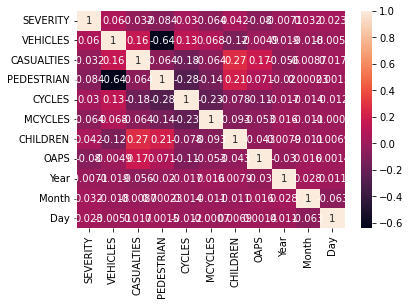

In [15]:
#selecting only numerical columns to be used for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

#computing the correlation matrix for the numerical columns
corr_matrix = numeric_cols.corr()

#plotting the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True)

By computing the correlation matrix for the numerical columns, I can see that most variables have a negative correlation with only a few having a positive correlation. Most values are fairly close to a value of 0 showing that in many cases there is no correlation between variables. One relationship that stands out in the heatmap is the correlation between PEDESTRIAN and VEHICLES, having a -0.64 correlation coefficient. This could show that as the number of vehicles involved in the incident increases, the number of pedestrians involved decreases. Logically, this makes sense but this may not always be correct as correlation does not imply causation. To investigate this further I will plot a scatter plot to investigate the relationship further. 

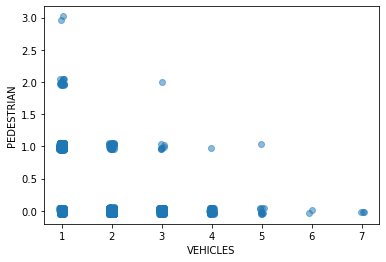

In [16]:
#adding random noise (jitter) to the data to give a visualisation for size of each point for the discrete data
jitter = 0.05 
df['VEHICLES_jitter'] = df['VEHICLES'] + np.random.uniform(-jitter, jitter, size=len(df))
df['PEDESTRIAN_jitter'] = df['PEDESTRIAN'] + np.random.uniform(-jitter, jitter, size=len(df))


#creating a scatter plot to try and visualise the correlation between vehicles and pedestrian columns
plt.scatter(df['VEHICLES_jitter'], df['PEDESTRIAN_jitter'], alpha=0.5)
plt.xlabel('VEHICLES')
plt.ylabel('PEDESTRIAN')
plt.show()

I decided to add some noise (jitter) to this plot because when comparing 2 discrete numerical variables you wont get a visualisation for the number of occurences for each point unless some noise is added. As shown by the scatter plot, it does show a fairly negative correlation with very low occurences for 6 and 7 vehicles with more occurences for the lower values.

array([[<AxesSubplot:title={'center':'DATE_'}>,
        <AxesSubplot:title={'center':'SEVERITY'}>,
        <AxesSubplot:title={'center':'VEHICLES'}>,
        <AxesSubplot:title={'center':'CASUALTIES'}>],
       [<AxesSubplot:title={'center':'PEDESTRIAN'}>,
        <AxesSubplot:title={'center':'CYCLES'}>,
        <AxesSubplot:title={'center':'MCYCLES'}>,
        <AxesSubplot:title={'center':'CHILDREN'}>],
       [<AxesSubplot:title={'center':'OAPS'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'VEHICLES_jitter'}>,
        <AxesSubplot:title={'center':'PEDESTRIAN_jitter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

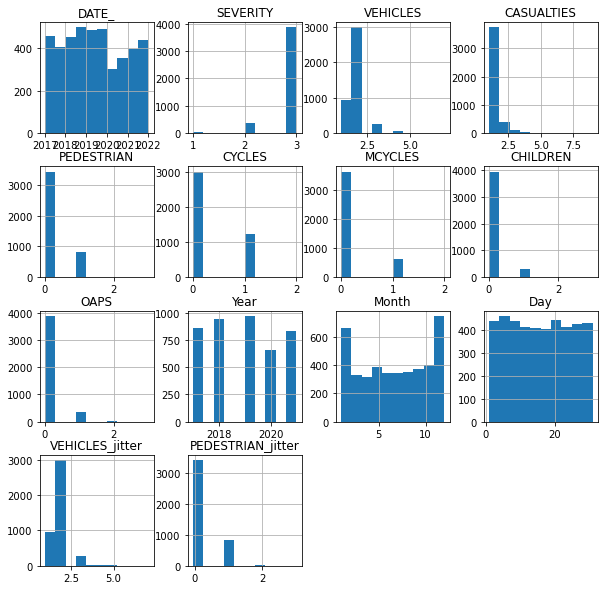

In [17]:
#creating histograms for each numerical column 
df.hist(figsize=(10, 10))

I have created histograms for each of the numerical columns in my dataset. This is to get an overview of the distributions of the variables and check to see if there seems to be any trends between each column. From these historgams I can clearly see that a lot of the columns are heavily weighted to the left side of the histogram, showing that a lot of the columns have low values, many close to or equal to 0. The only histogram that this is not true for is severity as most occurences are from the 2-3 range. 

# Step 4 - Asking questions about my data

1. Does the time and date affect the number of traffic accidents?
- What are the peak times for traffic incidents?
- On which days do most traffic incidents occur?
- Has the number of incidents changed over time? 
- Are there more accidents for pedestrians in the morning?

2. Are vehicle and person type related to the severity of the accident?
- Does the number of vehicles involved in the accident affect the severity of the accident?
- Are accidents involving motorcyles and cycles more severe on average?
- How often are there accidents involving motorcyles and cycles compared to normal vehicles (cars)
- Are accidents involving public transports more severe and do they have more casualties?

3. Is the type of accident and the severity of it related in any way?
- Are accidents involving motorcyclists and pedestrians typically more severe than those involving cars?
- Are junction accidents from major roads more severe than from minor roads?
- Are certain types of accidents more likely to result in more severe injuries?
- Is there a correlation between severity and the type of accident?

# Question 1: Does the time and date affect the number of traffic accidents?

In [18]:
#grouping by year and counting the number of incidents for each year 
incidents_per_year_type = df.groupby(['Year']).size()

#resetting the index of the resulting series to turn it back into a dataframe
incidents_per_year_type = incidents_per_year_type.reset_index(name='Number of Incidents')

#calculating the total number of incidents 
total_incidents = incidents_per_year_type['Number of Incidents'].sum()

#creating a new column for percentage of total for number of incidents per year
incidents_per_year_type['Percentage of Total'] = (incidents_per_year_type['Number of Incidents'] / total_incidents) * 100

#displaying the results
print(incidents_per_year_type)

   Year  Number of Incidents  Percentage of Total
0  2017                  857            20.093787
1  2018                  948            22.227433
2  2019                  972            22.790152
3  2020                  654            15.334115
4  2021                  834            19.554513


To begin the analysis of the first question, I thought it would be good to have an overview of how many incidents there were per year and the total percentage column shows that it is fairly equal, with 2020 having slightly fewer at 15% with isnt too far from the average.

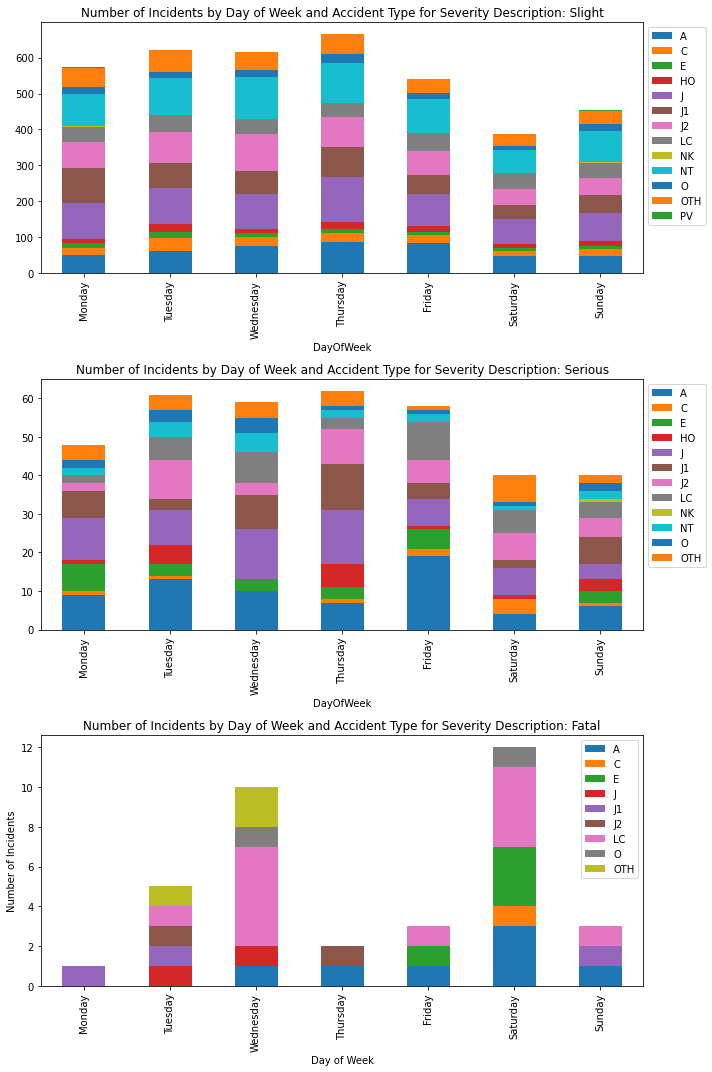

In [19]:
import matplotlib.pyplot as plt

#defining the order of the days of the week so the bar charts will be in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#converting the days of the week column to have a categorical order
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days, ordered=True)


#getting the unique values of severity description
severity_descriptions = df['SEVERITY_DESCRIPTION'].unique()

#creating a figure and subplots
fig, axs = plt.subplots(len(severity_descriptions), 1, figsize=(10, 5*len(severity_descriptions)))

#looping over the unique values of severity description
for i, severity_description in enumerate(severity_descriptions):
    #filtering the dataframe for the current severity description
    df_filtered = df[df['SEVERITY_DESCRIPTION'] == severity_description]
    
    #grouping by 'DayOfWeek' and 'ACCIDENT_TYPE', counting the number of incidents, unstacking the result 
    #and plotting it as a bar chart in the current subplot
    df_filtered.groupby(['DayOfWeek', 'ACCIDENT_TYPE']).size().unstack().plot(kind='bar', stacked=True, ax=axs[i])
    
    #setting the title of the current subplot
    axs[i].set_title('Number of Incidents by Day of Week and Accident Type for Severity Description: ' + severity_description)
    
    #adding a legend to be located in the best place not covering the bars
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
    
#adding x and y labels to the plot
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.legend()

#displaying the plots
plt.tight_layout()
plt.show()

Each stacked bar charts shows values for each different type of severity description, with the y axis showing the number of incidents and x axis showing each day of the week. The stacked bar charts show the accident type with a coloured legend. These bar charts help me understand if there is any sort of trend with certain days of the week being correlated with the number of incidents and different accident types and descriptions. The first bar chart highlighted 'slight' accidents hold the majority of number of incidents. The bar charts show almost no correlation as all bar charts are similar heights with Saturday and Sunday being slightly lower but not majorly. When looking at the severity description there seems to be no correlation at all with the day of the week of incident as there is a consistency for each day. When looking at the second bar chart highlighting 'serious' accidents, it is very similar to the results for 'slight' so there is no difference to be reported in this chart. However, the final 'fatal' bar chart is the most interesting one out of the three as there are many different aspects to be analysed. Firstly, Saturday is clearly the day where most 'fatal' accidents occur with there being a variety of reasons for the accident, mainly turning movements and elderly pedestrian incidents. It is interesting to discover that every type of accident has had a 'fatal' severity type, with loss of control being the major contributor. It is also important to note that there are several less number of incidents for 'fatal' accidents compared to the other two, so the sample size is fairly small and it is hard to make serious conclusions and assumptions from these bar charts.

In [20]:
#converting the time column to a datetime format in order to be able to extract the hour value 
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.time

#creating a new column in my dataframe that represents the hour value of the incident
df['Hour'] = df['TIME'].apply(lambda x: x.hour)


In [21]:
#creating a function to map certain hours to times of the day for easier analysis
def map_hour_to_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

#creating a new column by applying the previous function to each incident using the hour column
df['TimeOfDay'] = df['Hour'].apply(map_hour_to_time_of_day)

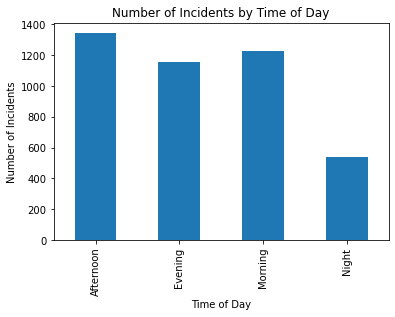

In [22]:
#counting the number of incidents that occur during each time of the day
incidents_per_time_of_day = df.groupby('TimeOfDay').size()

#plotting a bar chart showing the number of incidents for each time of the day
incidents_per_time_of_day.plot(kind='bar')

#adding the labels and title
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Time of Day')

#displaying the plot
plt.show()

This bar chart shows me the number of incidents for each time of the day. The total number of incidents for the afternoon, evening and morning are very similar with the night having around half compared to the others. This is expected as most people are asleep in the night even though driving conditions are generally more dangerous. Next I will explore whether there are different types of severe accidents for each time of the day.

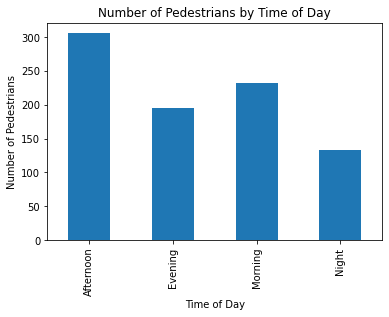

In [23]:
#grouping the number of pedestrian incidents for per time of the day and summing them 
pedestrians_per_time_of_day = df.groupby('TimeOfDay')['PEDESTRIAN'].sum()

#plotting a bar chart for this
pedestrians_per_time_of_day.plot(kind='bar')

#adding labels and title
plt.xlabel('Time of Day')
plt.ylabel('Number of Pedestrians')
plt.title('Number of Pedestrians by Time of Day')

#displaying the plot
plt.show()

I thought it would be interesting to see whether there are more pedestrian incidents at certain times of the day, more specifically if there were more in the morning due to people walking to school/work. This bar chart shows that most pedestrian incidents are in the afternoon, with morning holding the second most. The night is the lowest number which is expected but there are more than I expected as less people tend to walk in the nights compared to driving. 

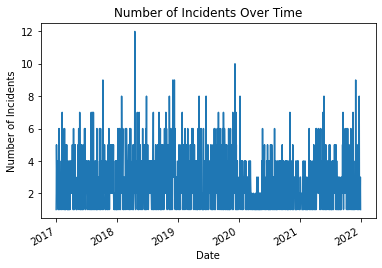

In [24]:
#grouping by date and accident type and plotting a bar chart 
df.groupby('DATE_')['ACCIDENT_TYPE'].count().plot()

#adding labels and a title
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

#creating the plot
plt.show()

I wanted to do some temporal analysis by looking at the trend of number of incidents over time, only a yearly basis to see if there are any larger trends to be seen. By looking at this bar chart I can see that from 2017-2020 there is almost no trend to be seen as the number of incidents are fairly consistent. However at the start of 2020 there is a significant decline in number of incidents until a noticeable rise again back to 'normal' in the middle of 2021 until 2022 where my data ends. Throughout, there are several peaks and inconsistencies which is expected as traffic incidents can be day to day dependent.

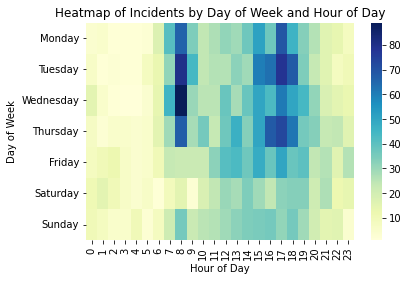

In [25]:
#selecting the data for the heatmap using the day of the week and hour
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack()

#plotting a heatmap using seaborn
sns.heatmap(heatmap_data, cmap='YlGnBu')

#adding labels and a tile
plt.title('Heatmap of Incidents by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

#creating the heatmap
plt.show()

I thought it would be good to see an overview of the number of incidents per hour for each day of the week using a heatmap to see obvious trends and possibly spot some outliers. It is very obvious to see in this heatmap that there seems to be a lot less accidents during the nightime (around 10-20 for most times) and that Wednesday at 8:00 is the peak number of accidents at around 90. There also tends to be a lot more incidents in the mornings (7:00-9:00) and the afternoon/evenings (15:00-19:00). It is also noticeable that the days with most accidents tend to be the weekdays, with the weekends having a more consistent spread of accidents for different times. 

# Question 2 - Are vehicle and person type related to the type of accident?

In [26]:
#calculating the correlation for vehicles and severity
correlation = df['VEHICLES'].corr(df['SEVERITY'])

#printing out the results
print(f"Correlation between number of vehicles and severity of accident: {correlation}")

Correlation between number of vehicles and severity of accident: 0.06049008246070492


Looking at the correlation coefficient for number of vehicles and the severity of the accident, there is a very low value, very close to 0, indicating that there is no correlation between the number of vehicles and the severity of the accident. In my exploratory data analysis section, I found an interesting point where there were values for 7 vehicles and 9 casualties for maximum. I would like to investigate this individual datapoint next to see if they are part of the same accident.

In [27]:
#filtering the dataframe to where there are 7 vehicles involved in the accident
df_7_vehicles = df[df['VEHICLES'] == 7]

#looking at the casualties column
casualties_7_vehicles = df_7_vehicles['CASUALTIES']

#print the number of casualties for 7 vehicles involved 
print(casualties_7_vehicles)

306     1
368     2
4041    1
Name: CASUALTIES, dtype: int64


As shown above there are 3 instances in the dataset where there are 7 vehicles involved in the accident. Interestingly, they all have a very low number of casualties, with none having the 9 casulties involved. This further proves that there is no correlation between the number of vehicles involved and the number of casualties.


In [28]:
#filtering the dataframe to look at casualties that had 9
df_9_casualties = df[df['CASUALTIES'] == 9]

#looking at the number of vehicles involved in that specific accident
vehicles_9_casualties = df_9_casualties['VEHICLES']

#printing the result
print(vehicles_9_casualties)

1874    3
Name: VEHICLES, dtype: int64


I am interested to actually see how many vehicles were involved in the accident that had 9 casualties. Surprisingly there were only 3 vehicles, with an average of 3 casualties per vehicle. This is also surprising to me.

In [29]:
#looking to see what the accident description was of the accident
accident_type_9_casualties = df_9_casualties['ACCIDENT_DESCRIPTION']

#printing the result
print(accident_type_9_casualties)

1874    Head On
Name: ACCIDENT_DESCRIPTION, dtype: object


When looking at the type of accident of this crash, it is not surprising to see it was a head on accident that are typically more severe and dangerous.

Overall, I can conclude that there does not seem to be any sort of correlation or trend relating to the number of vehicles involved in the accident and number of casualties.

In [30]:
#filtering the dataframe to only include rows where motorcycles are greater than 0
mcycles_accidents = df[df['MCYCLES'] > 0]

#grouping by 'SEVERITY_DESCRIPTION' and counting the number of accidents in each group
mcycles_accidents_by_severity = mcycles_accidents.groupby('SEVERITY_DESCRIPTION').count()

#printing the results
print(mcycles_accidents_by_severity)


                      DATE_  TIME  SEVERITY  ACCIDENT_TYPE   
SEVERITY_DESCRIPTION                                         
Fatal                     6     6         6              6  \
Serious                  87    87        87             87   
Slight                  540   540       540            540   

                      ACCIDENT_DESCRIPTION  VEHICLES  CASUALTIES  PEDESTRIAN   
SEVERITY_DESCRIPTION                                                           
Fatal                                    6         6           6           6  \
Serious                                 87        87          87          87   
Slight                                 540       540         540         540   

                      CYCLES  MCYCLES  ...  OAPS  RENDER  Year  Month  Day   
SEVERITY_DESCRIPTION                   ...                                   
Fatal                      6        6  ...     6       6     6      6    6  \
Serious                   87       87  ...    87      

In [31]:
#flitering to only include values where cyles are greater than 0
cycles_accidents = df[df['CYCLES'] > 0]

#grouping by 'SEVERITY_DESCRIPTION' and counting the number of accidents in each group
cycles_accidents_by_severity = cycles_accidents.groupby('SEVERITY_DESCRIPTION').count()

#printing the results
print(cycles_accidents_by_severity)

                      DATE_  TIME  SEVERITY  ACCIDENT_TYPE   
SEVERITY_DESCRIPTION                                         
Fatal                     4     4         4              4  \
Serious                 101   101       101            101   
Slight                 1146  1146      1146           1146   

                      ACCIDENT_DESCRIPTION  VEHICLES  CASUALTIES  PEDESTRIAN   
SEVERITY_DESCRIPTION                                                           
Fatal                                    4         4           4           4  \
Serious                                101       101         101         101   
Slight                                1146      1146        1146        1146   

                      CYCLES  MCYCLES  ...  OAPS  RENDER  Year  Month   Day   
SEVERITY_DESCRIPTION                   ...                                    
Fatal                      4        4  ...     4       4     4      4     4  \
Serious                  101      101  ...   101   

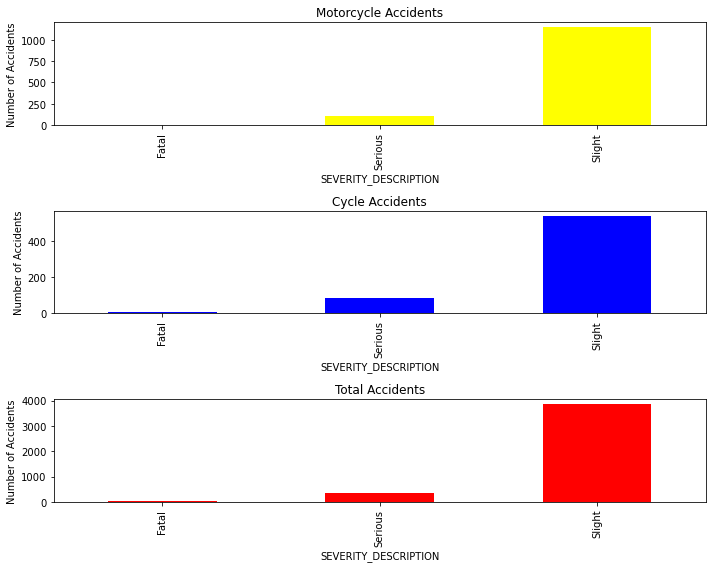

In [32]:
#counting the total number of accidents by severity
total_accidents_by_severity = df['SEVERITY_DESCRIPTION'].value_counts()

#sorting the index so that they have the same order in the bar charts for the x axis
mcycles_accidents_by_severity = mcycles_accidents_by_severity.sort_index()
total_accidents_by_severity = total_accidents_by_severity.sort_index()
cycles_accidents_by_severity = cycles_accidents_by_severity.sort_index()

#creating a figure with 3 subplots
fig, axs = plt.subplots(3, figsize=(10, 8))

#plot for motorcycle accidents
mcycles_accidents_by_severity.plot(kind='bar', ax=axs[1], color = 'blue', legend = False)
axs[1].set_title('Cycle Accidents')
axs[1].set_ylabel('Number of Accidents')

#plot for cycle accidents
cycles_accidents_by_severity.plot(kind='bar', ax=axs[0], color = 'yellow', legend = False)
axs[0].set_title('Motorcycle Accidents')
axs[0].set_ylabel('Number of Accidents')

#plot for total number of accidents 
total_accidents_by_severity.plot(kind='bar', ax=axs[2], color = 'red', legend = False)
axs[2].set_title('Total Accidents')
axs[2].set_ylabel('Number of Accidents')

#adjusting the layout to fit properly
plt.tight_layout()

#creating the plots
plt.show()


By comparing these three bar charts, the first one is using only motorcyle accidents, the second one is using only cycle accidents and the third is using total accidents for every vehicle. I can see that all bar charts are almost identical in the fact that they have roughly the same number of accidents for each different severity type. All have 'slight' as the majority with 'fatal' being the smallest. For motorcyle and cycle accidents, the bar for 'fatal' is not visible, having a very small value close to 0. This shows that in fact motorycle and cycle accidents are not necessarily more dangerous or severe compared to other accidents. In fact there is almost no difference compared to the total number of accidents. This allows me to conclude that motorcyle and cycle accidents are not more severe on average, they are actually slightly less severe.

In [33]:
#filtering the data to include only public transport accidents
public_transport_accidents = df[df['ACCIDENT_TYPE'] == 'PV']

#printing out the 'SEVERITY_DESCRIPTION' and 'CASUALTIES'
print(public_transport_accidents[['SEVERITY_DESCRIPTION', 'CASUALTIES']])


     SEVERITY_DESCRIPTION  CASUALTIES
2168               Slight           1
2203               Slight           1
2330               Slight           1
2416               Slight           1
2460               Slight           1
2461               Slight           1
2469               Slight           1
2732               Slight           8


I wanted to take a look at all occurences of incidents that involved public transport ('PV'). It turns out that all accidents involving public transport were all considered 'slight' severity. However there is a noticeable outlier in this set of accidents in that one of the accidents had 8 casualties, compared to the rest being only 1. This is very interesting that this accident was considerably more dangerous. It appears that accidents involving public transport are not more severe, however the accident that had 8 casualties was only a 'slight' severity accident which I will consider as an outlier and would need more evidence that I do not have in this dataset to understand why this accident had so many casualties.

# Question 3 - Is the type of accident and the severity of it related in any way?

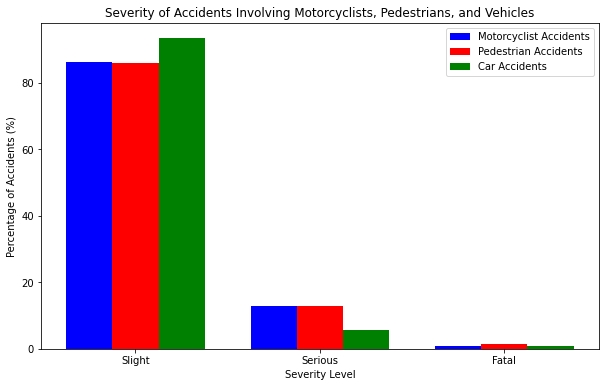

In [34]:
#filtering for accidents involving motorcyclists, pedestrians and cars
motorcyclist_accidents = df[df['RENDER'] == 'MCYC']
pedestrian_accidents = df[df['RENDER'] == 'A']
car_accidents = df[df['RENDER'] == 'CARS']

#getting the counts of each severity level for each type of accident
motorcyclist_severity_counts = motorcyclist_accidents['SEVERITY_DESCRIPTION'].value_counts()
pedestrian_severity_counts = pedestrian_accidents['SEVERITY_DESCRIPTION'].value_counts()
car_severity_counts = car_accidents['SEVERITY_DESCRIPTION'].value_counts()

#calculating the proportions for each type
motorcyclist_severity_proportions = motorcyclist_severity_counts / motorcyclist_severity_counts.sum()
pedestrian_severity_proportions = pedestrian_severity_counts / pedestrian_severity_counts.sum()
car_severity_proportions = car_severity_counts / car_severity_counts.sum()

#calculating the percentages
motorcyclist_severity_percentages = motorcyclist_severity_proportions * 100
pedestrian_severity_percentages = pedestrian_severity_proportions * 100
car_severity_percentages = car_severity_proportions * 100

#defining the label and bar positions
labels = motorcyclist_severity_percentages.index
x = np.arange(len(labels))
width = 0.25  

#creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

#adding the bars with different colours
rects1 = ax.bar(x - width, motorcyclist_severity_percentages.values, width, label='Motorcyclist Accidents', color = 'blue')
rects2 = ax.bar(x, pedestrian_severity_percentages.values, width, label='Pedestrian Accidents', color = 'red')
rects3 = ax.bar(x + width, car_severity_percentages.values, width, label='Car Accidents', color = 'green')

#adding the labels, title, and legend
ax.set_xlabel('Severity Level')
ax.set_ylabel('Percentage of Accidents (%)')
ax.set_title('Severity of Accidents Involving Motorcyclists, Pedestrians, and Vehicles')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#showing the plot
plt.show()


This bar chart compares the percentage of accidents for each severity level for different types of accidents involving, motorcyclists, pedestrians and cars. I instantly notice that each accident type follows a similar trend in that 'slight' takes up the majority of percentage of accidents , with 'fatal' being the least. However, I also notice that for 'slight' severity level, car accidents take up a larger percentage of total compared to both motorcycles and pedestrians, sitting at over 90%. This means that there are significantly less 'serious' accidents and around the same percentage of 'fatal' accidents as motorcyclists. This shows that car accidents do tend to be less severe than both pedestrian and motorcyclist accidents. Another noticeable feature about this graph is that motorcyclist and pedestrian accidents are almost identical in their percentage of total for each severity level, however unsurprisingly there is a higher percentage of fatal accidents for pedestrians compared to the other two types of accidents.

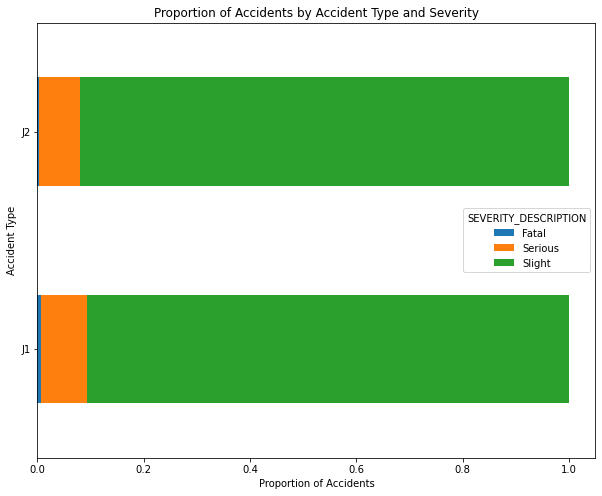

In [35]:
#filtering the dataframe to include only 'J1' and 'J2' accidents
df_filtered = df[df['ACCIDENT_TYPE'].isin(['J1', 'J2'])]

#grrouping by 'ACCIDENT_TYPE' and 'SEVERITY_DESCRIPTION' and counting the number of incidents
grouped = df_filtered.groupby(['ACCIDENT_TYPE', 'SEVERITY_DESCRIPTION']).size().unstack()

#normalising the counts to get the proportions
grouped = grouped.divide(grouped.sum(axis=1), axis=0)

#plotting the results
fig, ax = plt.subplots(figsize=(10, 8))
grouped.plot(kind='barh', stacked=True, ax=ax)

#setting the labels and axes
ax.set_xlabel('Proportion of Accidents')
ax.set_ylabel('Accident Type')
ax.set_title('Proportion of Accidents by Accident Type and Severity')

#creating the plot
plt.show()


I wanted to explore if there is a major difference in severity for junction accidents that were from a minor road and a major road. My expectation before was that there would be significantly more severe accidents from major roads as cars will more likely be going faster and it will be busier. However, looking at this bar chart I am surprised that there are only slighlty a few more 'fatal' accidents for major road junctions compared to minor roads. There are also a few more 'serious' accidents, but 'slight' accidents are almost the same. 

In [36]:
#filtering the data to include only 'J1' and 'J2' accident types
df_filtered = df[df['ACCIDENT_TYPE'].isin(['J1', 'J2'])]

#grouping by 'ACCIDENT_TYPE' and 'SEVERITY_DESCRIPTION' and counting the number of incidents
grouped = df_filtered.groupby(['ACCIDENT_TYPE', 'SEVERITY_DESCRIPTION']).size()

#printing the results
print(grouped)

ACCIDENT_TYPE  SEVERITY_DESCRIPTION
J1             Fatal                     3
               Serious                  44
               Slight                  453
J2             Fatal                     2
               Serious                  42
               Slight                  503
dtype: int64


I decided to take a look at the count for each of these types of accidents to see if there were more for major road accidents. This does not seem to be true as there are around the same number of accidents for each in terms to total. I also noticed that there is only 1 more 'fatal' accident for major road junctions which is surprising.  

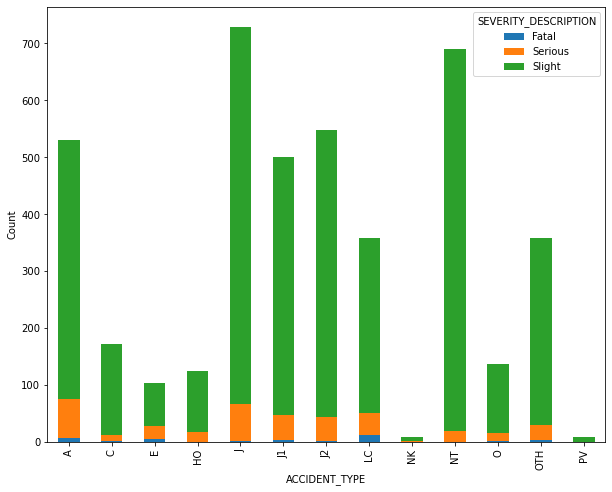

In [37]:
#creating a stacked bar chart to compare the severity of the incident with the accident type
df.groupby('ACCIDENT_TYPE')['SEVERITY_DESCRIPTION'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('ACCIDENT_TYPE')
plt.ylabel('Count')
plt.show()

This stacked bar chart shows the relationship between the severity of the description and the type of accident. Immediately, I can see that the most common severity type of incidents recorded are 'slight', with a decent amount being 'serious', with very few being 'fatal'. There are very few incidents that are recorded as ' NK (not known)', along with 'PV (public vehicles)'. The most common type of accident are the 'J' columns, that highlight turning movements, so most likely junctions, with nose to tail being a close second. I can notice that 'LC (Loss of control)' and 'A (Adult Pedestrian)' have a significant amount of more 'fatal' and 'serious' severity types which is expected, but still the majority remains as 'slight'. Overall this stacked bar chart helps give me a good understanding of both variables and the relationship, highlighted many trends.

In [38]:
#creating a contingency table (cross-tabulation) to analyse the relationship between the two variables
print(pd.crosstab(df['ACCIDENT_TYPE'], df['SEVERITY']))

SEVERITY        1   2    3
ACCIDENT_TYPE             
A               7  68  456
C               1  10  161
E               4  24   75
HO              0  17  108
J               2  65  661
J1              3  44  453
J2              2  42  503
LC             12  39  307
NK              0   1    7
NT              0  18  672
O               2  14  121
OTH             3  26  329
PV              0   0    8


This contingency table is a follow on from my stacked bar chart where I look at the relationship between the severity and type of accident. It is merely just to look at actual values in a numerical form compared to the visual form.

In [39]:
#importing the relevant package to be used to calculate Cramers V
from scipy.stats import chi2_contingency

#creating a function to calculate Cramers V that can be used for the variables in my dataset
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

#using the function to calculate the value for accident type and severity
print('Cramers V:', cramers_v(df['ACCIDENT_TYPE'], df['SEVERITY']))


Cramers V: 0.1152504532785126


By purely looking at the stacked bar chart and contingency table, it is not completely clear to see if there is a significant association between the two variables. I have used Cramers V test to see if there if there is any sort of association. I have obtained a low value of 0.115 (3 d.p) which indicates that there is a weak association. It does show some sort of association but not a very strong one, which may be considered to be negligible in this context. This is accompanied by the stacked bar chart that also shows that there doesnt seem to be any sort of association. 

# Step 5 - Summarising and Conclusion

Throughout this analysis I have gained a lot of insights and drawn many conclusions from my dataset. This robust dataset allowed me to analyse many different areas of accidents in Bristol and I was able to compare different columns of data to be able to create and explore questions that I wanted to answer. The questions I decided to choose allowed me to create sub-questions that were more focused on specific assumptions or ideas that I had about the data initially. The goal of each question was to be able to answer and make conclusions about key areas of the dataset, specifically using the most important columns and to be able to cover the whole dataset throughout my analysis. Before starting my analysis I found that this dataset needed a decent amount of preparation and cleaning, along with creating new columns that would help complete my analysis. My exploratory data analysis section allowed me to gain a broad understanding of my data, calculating basic statistics and graphs, and to be able to observe the data I have in order for me to focus my analysis on certain areas and create questions that cover interesting areas about the data. 
    
For my first question I decided to utilise the time and date columns to analyse how date and time affects traffic incidents. I was able to conclude that there was no significant correlation between the day of the week and number of accidents, however the weekend had slightly less accidents which was slightly surprising. The peak times for accidents were mainly in the morning and evening, this to me suggests that this is due to rush hour times as people are travelling to school and work. This was not true for the weekend which even further supports this claim that there are more accidents during rush hour. There was a noticeable dip in number of accidents at the start of 2020 which is surprising but is also when lockdown started due to COVID-19 and then there was a rise during the start of 2021 until 2022 where it reverted back to normal. Overall I concluded that the time and date most definitely affects the number of traffic accidents, with there being obvious patterns to these accidents, however the severity of the accident does not seem to matter regarding this.

My second question focused on looking at whether vehicle and person type are related to the seveity of the accident. I discovered that this was not necessarily true at all as through my analysis I found that motorcycle and cycle accidents were very similar to the severity of those that involved cars. I did find that there were actually no 'fatal' motorcycle accidents which was surprising. In my analysis I discover that accidents involving public vehicles (PV) were not more severe at all, although I did find one oultier that had 8 casualties but only fell under the 'slight' severity level. Overall, I did not find any conlcusive evidence that vehicle and person type were related to the severity of the accident.

My third and final question looked at if the type of accident and the severity of it were related in any way. I found that motorcycle and pedestrian accidents had almost identical values for each severity level, with cars actually having more 'slight' severity accidents compared to the other two with less 'serious' accidents. These values were looked at using a percentage of total due to the sample size for cars being larger than the other type of accidents. I decided to focus on looking at junction accidents, one that was from a major road and the other that was from a minor road. My conclusion here was that there no major differences except that major roads are slightly more dangerous on average, but not majorly. My conlusion overall was that there is no significant association between accident type and severity due to a low Cramers V value of 0.115 which shows a very weak association to the point where it can disregarded. I found that junction incidents were significantly the most common type of accident, with public vehicles being the lowest. Loss of control and adult pedestrian accidents were found to be slightly more fatal than the rest, with the every accident holding a majority of 'slight' severity. 

Overall, I have gained a lot from this analysis, learning new skills and ways to look at data in order to conduct a sound analysis that allows for many conclusions to be found from a dataset. For future work, there can also be a lot more found when looking at traffic accidents in Bristol, this would require more data and different columns of data to be explored, such as the location of the accident, more details on the accident itself such as the reason behind the accident, the ages of the drivers and many more details that could allow for an even further detailed analysis that would allow for more questions and areas to be explored. It may also be useful to explore further outside of Bristol and maybe look at other cities and possibly even compare those findings with Bristol accidents. Having a larger dataset would also be helpful but that cannot be controlled unless there are more accidents in Bristol, this is why looking at larger cities such as London would be helpful for analysis.